In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback

# import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


10:59:01 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=40502;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=430975;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=76398;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=159046;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=561895;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=773853;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

10:59:01 INFO      Starting 3ML!                                                                     ]8;id=275508;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=432751;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=466418;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=104843;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=997262;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=973393;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=231861;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=586149;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

10:59:02 WARNING   Multinest minimizer not available                                           ]8;id=330119;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=348660;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=574308;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=11796;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

10:59:02 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=984147;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=839917;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=519245;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=570155;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=819778;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=832638;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=949163;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=124027;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 355.31it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 32.16it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 32.16it/s]   

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 37/37 [00:11<00:00, 68.32it/s]

00:34:41 INFO      Region of Interest:                                                                   ]8;id=483079;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=506540;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#291\291]8;;\

         INFO      -------------------                                                                   ]8;id=988977;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=255546;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (301.866, 32.442), model radius:      ]8;id=325662;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=630664;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.500 deg, display radius: 7.000 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=766738;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=519713;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#295\295]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=197514;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=850816;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      --------------------                                                                  ]8;id=124358;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=275155;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      Width x height 150 x 150 px                                                           ]8;id=489410;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=256289;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#299\299]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=309759;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=992612;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#304\304]8;;\

         INFO                                                                                            ]8;id=248096;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=379417;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#307\307]8;;\

         INFO      Response:                                                                             ]8;id=964879;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=308112;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      ---------                                                                             ]8;id=335969;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=156952;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      Response file:                                                                   ]8;id=358064;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=583606;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/KM2A1234full_mcpsfnewfix13                
                  .root                                                                                            

         INFO      Number of dec bins: 110                                                          ]8;id=321075;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=465464;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 14                                ]8;id=495195;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=923712;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=545846;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=829330;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#313\313]8;;\

         INFO      Map Tree:                                                                             ]8;id=977175;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=735488;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      ----------                                                                            ]8;id=377025;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=682225;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,RING,2.806016e+06,2.792838e+06,1.004718,30463,99.872665
1,1,1024,RING,5.569986e+06,5.529948e+06,1.007240,30463,99.872665
2,2,1024,RING,2.954008e+06,2.916588e+06,1.012830,30463,99.872665
3,3,1024,RING,8.166612e+05,7.948710e+05,1.027414,30463,99.872665
4,4,1024,RING,7.587110e+04,6.785322e+04,1.118165,30463,99.872665
5,5,1024,RING,1.440672e+04,1.095333e+04,1.315282,30463,99.872665
6,6,1024,RING,7.681406e+03,5.727486e+03,1.341148,30463,99.872665
7,7,1024,RING,1.881294e+03,1.189396e+03,1.581721,30463,99.872665
8,8,1024,RING,6.344548e+02,3.402916e+02,1.864445,30463,99.872665
9,9,1024,RING,2.253187e+02,1.181678e+02,1.906769,30463,99.872665


         INFO      This Map Tree contains 1216.239 transits in the first bin                        ]8;id=129825;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=765927;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 6.82 Mb                                                         ]8;id=391775;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=230311;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=384350;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=277194;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#319\319]8;;\

         INFO      Active energy/nHit planes (10):                                                       ]8;id=153806;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=282763;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#321\321]8;;\

         INFO      -------------------------------                                                       ]8;id=977359;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=684290;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13']                                ]8;id=629070;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=415242;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

00:34:42 INFO      J1951P2608 in model_radius: 7.5 sf:True pf:True kf:False indexf:False               ]8;id=719981;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=104089;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=98397;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=124352;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.13e-16 kb=(1.13e-18, 3.53e-16) index=-3.43 indexb=(-5.50,-1.50)                             

         INFO      Mor:                                                                                ]8;id=182533;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=187012;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=1.00 sb=(0.12,1.88) fitrange=3.36                                                         

         INFO      J1954P2836u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=265828;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=40133;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=660825;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=838888;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.20e-17 kb=(1.00e-18, 1.42e-16) index=-2.92 indexb=(-5.02,-1.50)                             

         INFO      Mor: fitrange=0.56                                                                  ]8;id=24404;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=147458;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J1956P2921 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=140369;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=562536;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=531511;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=241717;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.62e-16 kb=(1.62e-18, 4.42e-16) index=-3.42 indexb=(-5.22,-1.62)                             

         INFO      Mor:                                                                                ]8;id=245056;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=927784;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.78 sb=(0.38,1.18) fitrange=1.84                                                         

         INFO      J1959P2846u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=531466;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=976705;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=976051;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=256411;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=8.40e-17 kb=(1.00e-18, 2.24e-16) index=-2.90 indexb=(-4.40,-1.50)                             

         INFO      Mor:                                                                                ]8;id=243440;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=21095;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.29 sb=(0.05,0.53) fitrange=0.72                                                         

         INFO      J2002P3244u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=261529;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=113305;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=583600;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=711637;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.50e-17 kb=(1.00e-18, 7.50e-17) index=-2.70 indexb=(-5.50,-1.50)                             

         INFO      Mor: fitrange=0.88                                                                  ]8;id=238623;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=110229;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#358\358]8;;\

         INFO      J2005P3415 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=509744;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=907756;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=997416;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=894221;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=5.60e-17 kb=(1.00e-18, 1.56e-16) index=-3.79 indexb=(-5.50,-1.50)                             

         INFO      Mor:                                                                                ]8;id=794917;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=203675;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.33 sb=(0.00,0.73) fitrange=1.20                                                         

         INFO      J2005P3050 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=792813;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=801397;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=840260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=369530;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=4.60e-17 kb=(1.00e-18, 1.46e-16) index=-3.62 indexb=(-5.50,-1.50)                             

         INFO      Mor:                                                                                ]8;id=243856;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=970507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.27 sb=(0.00,0.67) fitrange=1.04                                                         

         INFO      J2018P3643u in roi: 7.0 sf:True pf:True kf:False indexf:False                       ]8;id=28375;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=660572;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=666117;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=126633;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=3.93e-16 kb=(3.93e-18, 6.13e-16) index=-3.46 indexb=(-4.21,-2.71)                             

         INFO      Mor:                                                                                ]8;id=412950;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=589319;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.24 sb=(0.16,0.32) fitrange=0.32                                                         

         INFO      J2020P3649u in model_radius: 7.5 sf:True pf:True kf:False indexf:False              ]8;id=245004;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=237185;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=210137;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=485707;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=2.29e-16 kb=(2.29e-18, 4.09e-16) index=-3.31 indexb=(-4.21,-2.41)                             

         INFO      Mor:                                                                                ]8;id=71034;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=598427;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.12 sb=(0.00,0.28) fitrange=0.32                                                         

         INFO      J2027P3657 in model_radius: 7.5 sf:True pf:True kf:False indexf:False               ]8;id=632254;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=539365;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#327\327]8;;\

         INFO      Spec:                                                                               ]8;id=250502;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=892075;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=5.00e-17 kb=(1.00e-18, 1.70e-16) index=-3.21 indexb=(-5.50,-1.50)                             

         INFO      Mor:                                                                                ]8;id=127260;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=847110;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=0.38 sb=(0.00,0.78) fitrange=1.84                                                         

         INFO      J2028P3352 in roi: 7.0 sf:True pf:True kf:False indexf:False                        ]8;id=649987;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=320262;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#320\320]8;;\

         INFO      Spec:                                                                               ]8;id=669466;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=765046;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#348\348]8;;\
                   K=1.61e-16 kb=(1.61e-18, 5.41e-16) index=-3.38 indexb=(-5.50,-1.50)                             

         INFO      Mor:                                                                                ]8;id=301401;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=645453;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#350\350]8;;\
                   sigma=1.70 sb=(0.00,3.54) fitrange=6.88                                                         

         INFO      Set diffuse range: [61.99999999999997, 77.99999999999997] [-8, 8]                  ]8;id=598337;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=270220;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1180\1180]8;;\

         INFO      ra dec coner:                                                                      ]8;id=520943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=893912;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1181\1181]8;;\

         INFO      (304.4912371648376, 21.391001320348884)                                            ]8;id=303908;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=551701;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1182\1182]8;;\

         INFO      (315.2410626992212, 34.08840745864482)                                             ]8;id=575334;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=497887;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1183\1183]8;;\

         INFO      (298.500063237674, 43.42407956381977)                                              ]8;id=241721;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=832933;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1184\1184]8;;\

         INFO      (289.15715314993014, 29.449215034389226)                                           ]8;id=315660;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=922451;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1185\1185]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=259036;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=878423;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1224\1224]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 6.8230958976128815e-06                                                ]8;id=53416;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=37341;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1225\1225]8;;\
                  ratio: 0.05384485123328068                                                                       

         INFO      set K to: 5e-16                                                                    ]8;id=260965;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=39542;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1226\1226]8;;\

         INFO      diffuse file path: ../../data/Diffuse_KM2A_case1_dust_bkg_template.fits            ]8;id=663067;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=990979;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1253\1253]8;;\

Model summary:
==============

                   N
Point sources      2
Extended sources  10
Particle sources   0

Free parameters (24):
--------------------

                                         value min_value max_value   
J1951P2608.spectrum.main.Powerlaw.K        0.0       0.0       0.0  \
J1951P2608.spectrum.main.Powerlaw.index  -3.43      -5.5      -1.5   
J1954P2836u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1954P2836u.spectrum.main.Powerlaw.index -2.92     -5.02      -1.5   
J1956P2921.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J1956P2921.spectrum.main.Powerlaw.index  -3.42     -5.22     -1.62   
J1959P2846u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J1959P2846u.spectrum.main.Powerlaw.index  -2.9      -4.4      -1.5   
J2002P3244u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J2002P3244u.spectrum.main.Powerlaw.index  -2.7      -5.5      -1.5   
J2005P3415.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J2005P3415.spectrum.main.Powerlaw.index  -3.79      -5.5      -1.5   
J2005P3050.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J2005P3050.spectrum.main.Powerlaw.index  -3.62      -5.5      -1.5   
J2018P3643u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J2018P3643u.spectrum.main.Powerlaw.index -3.46     -4.21     -2.71   
J2020P3649u.spectrum.main.Powerlaw.K       0.0       0.0       0.0   
J2020P3649u.spectrum.main.Powerlaw.index -3.31     -4.21     -2.41   
J2027P3657.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J2027P3657.spectrum.main.Powerlaw.index  -3.21      -5.5      -1.5   
J2028P3352.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
J2028P3352.spectrum.main.Powerlaw.index  -3.38      -5.5      -1.5   
Diffuse.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index      -3.0      -5.0      -1.0   

                                                    unit  
J1951P2608.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1951P2608.spectrum.main.Powerlaw.index                   
J1954P2836u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1954P2836u.spectrum.main.Powerlaw.index                  
J1956P2921.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J1956P2921.spectrum.main.Powerlaw.index                   
J1959P2846u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J1959P2846u.spectrum.main.Powerlaw.index                  
J2002P3244u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J2002P3244u.spectrum.main.Powerlaw.index                  
J2005P3415.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J2005P3415.spectrum.main.Powerlaw.index                   
J2005P3050.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J2005P3050.spectrum.main.Powerlaw.index                   
J2018P3643u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J2018P3643u.spectrum.main.Powerlaw.index                  
J2020P3649u.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
J2020P3649u.spectrum.main.Powerlaw.index                  
J2027P3657.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J2027P3657.spectrum.main.Powerlaw.index                   
J2028P3352.spectrum.main.Powerlaw.K       keV-1 s-1 cm-2  
J2028P3352.spectrum.main.Powerlaw.index                   
Diffuse.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                      

Fixed parameters (46):
---------------------

                                                                                    value   
J1951P2608.Gaussian_on_sphere.lon0                                                 297.94  \
J1951P2608.Gaussian_on_sphere.lat0                                                  26.15   
J1951P2608.Gaussian_on_sphere.sigma                                                   1.0   
J1951P2608.spectrum.main.Powerlaw.piv                                       50000000000.0   
J1954P2836u.position.ra                                                            298.55   
J1954P283

00:34:43 INFO      Considering 8 dec bins for extended source J1951P2608            ]8;id=430206;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=599145;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 26.150                       ]8;id=293831;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=137084;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=512857;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=295547;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.920                       ]8;id=450947;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=743522;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1959P2846u           ]8;id=165641;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=402983;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.780                       ]8;id=438145;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=903296;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J2005P3415            ]8;id=516233;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=453962;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.870                       ]8;id=355959;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=926600;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=14248;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=280396;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 30.850                       ]8;id=799432;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=730537;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=762103;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=291574;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.720                       ]8;id=294525;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=271462;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2020P3649u           ]8;id=62801;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=242783;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.820                       ]8;id=522067;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=413346;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J2027P3657            ]8;id=887487;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=918408;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.950                       ]8;id=991008;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=285624;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 16 dec bins for extended source J2028P3352           ]8;id=544419;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=385614;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.880                       ]8;id=177815;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=533335;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=583161;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=819540;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 32.544                       ]8;id=423699;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638043;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=580269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=978420;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=459330;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=446207;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1951P2608.spectrum.main.Powerlaw.K,(1.1 -0.6 +1.5) x 10^-27,1 / (cm2 keV s)
J1951P2608.spectrum.main.Powerlaw.index,-3 +/- 10,
J1954P2836u.spectrum.main.Powerlaw.K,(3.8 +/- 0.4) x 10^-26,1 / (cm2 keV s)
J1954P2836u.spectrum.main.Powerlaw.index,-2.90 +/- 0.12,
J1956P2921.spectrum.main.Powerlaw.K,(1.46 -0.13 +0.14) x 10^-25,1 / (cm2 keV s)
J1956P2921.spectrum.main.Powerlaw.index,-3.38 +/- 0.12,
J1959P2846u.spectrum.main.Powerlaw.K,(8.2 +/- 0.6) x 10^-26,1 / (cm2 keV s)
J1959P2846u.spectrum.main.Powerlaw.index,-2.88 +/- 0.08,
J2002P3244u.spectrum.main.Powerlaw.K,(1.77 -0.25 +0.29) x 10^-26,1 / (cm2 keV s)


Correlation matrix:

1.00,-0.02,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
-0.02,1.00,0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
-0.00,0.00,1.00,-0.31,-0.41,0.03,0.19,-0.05,-0.01,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.02,-0.00,0.05,-0.02
0.00,-0.00,-0.31,1.00,0.12,-0.21,-0.07,0.06,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.02,0.01
-0.00,0.00,-0.41,0.12,1.00,0.21,-0.49,0.08,0.03,-0.01,0.06,0.00,0.04,0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,0.12,0.03,-0.28,0.07
0.00,-0.01,0.03,-0.21,0.21,1.00,-0.00,-0.27,-0.00,0.01,0.01,0.02,0.00,0.02,-0.00,0.01,0.00,-0.00,-0.00,0.00,0.02,0.06,0.01,-0.16
-0.00,0.00,0.19,-0.07,-0.49,-0.00,1.00,-0.23,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,0.02,-0.00
0.00,-0.00,-0.05,0.06,0.08,-0.27,-0.23,1.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.01,-0.00,-0.02
0.00,-0.00,-0.01,0.00,0.03,-0.00,-0.00,-0.00,1.00,-0.49,0.02,-0.00,0.02,-0.00,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.04,0.00,-0.12,0.05
-0.00,0.00,0.00,-0.00,-0.01,0.01,0.00,0.00,-0.49,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.02,0.01,0.06,-0.07
0.00,-0.00,-0.01,0.00,0.06,0.01,-0.00,0.00,0.02,-0.01,1.00,0.41,0.04,0.00,0.02,0.00,-0.00,0.00,-0.00,0.00,0.09,0.02,-0.23,0.04


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,8267.804967
total,8267.804967


Values of statistical measures:

,statistical measures
AIC,16583.612748
BIC,16846.729744


00:44:02 WARNING   Parameter J2027P3657.spectrum.main.Powerlaw.K is close to the maximum value:        ]8;id=712626;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=409322;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#548\548]8;;\
                  -5.70e+01 < -5.70e+01                                                                            

         INFO      Parameter J2027P3657.spectrum.main.Powerlaw.K is close to the boundary, extend the  ]8;id=674008;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=627061;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#648\648]8;;\
                  boundary to (1.0000000000000002e-27, 1.7e-24).                                                   

00:44:02 INFO      Considering 8 dec bins for extended source J1951P2608            ]8;id=54227;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=878850;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 26.150                       ]8;id=923776;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=970642;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=492414;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=290426;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.920                       ]8;id=669969;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=526695;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1959P2846u           ]8;id=993819;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=954621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.780                       ]8;id=711858;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=531168;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J2005P3415            ]8;id=981680;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=471017;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.870                       ]8;id=295426;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=521809;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

00:44:03 INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=58457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=898585;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 30.850                       ]8;id=45279;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=517475;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=423020;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=523684;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.720                       ]8;id=690313;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=415233;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2020P3649u           ]8;id=323570;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=155755;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.820                       ]8;id=180562;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=733781;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J2027P3657            ]8;id=731422;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=649337;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.950                       ]8;id=390154;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=769892;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 16 dec bins for extended source J2028P3352           ]8;id=257047;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=545890;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.880                       ]8;id=206149;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=548908;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=534642;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=950901;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 32.544                       ]8;id=809872;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=835400;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 8 dec bins for extended source J1951P2608            ]8;id=50579;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=957974;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 26.150                       ]8;id=358929;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=793128;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=41534;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=710668;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.920                       ]8;id=961570;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=257219;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1959P2846u           ]8;id=796883;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=531415;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.780                       ]8;id=723161;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=653014;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J2005P3415            ]8;id=521921;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=825458;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.870                       ]8;id=370583;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=701447;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=257374;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=627585;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 30.850                       ]8;id=355742;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=47209;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=360278;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=479162;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.720                       ]8;id=797570;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=192893;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2020P3649u           ]8;id=300731;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=21269;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.820                       ]8;id=601510;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=953922;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J2027P3657            ]8;id=371352;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=866320;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.950                       ]8;id=236807;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=100460;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 16 dec bins for extended source J2028P3352           ]8;id=363611;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=704872;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.880                       ]8;id=531095;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=947518;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=349850;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=10443;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 32.544                       ]8;id=887837;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=73036;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=537177;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=22268;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=603619;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=136367;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
J1951P2608.spectrum.main.Powerlaw.K,(1.13 +/- 0.05) x 10^-27,1 / (cm2 keV s)
J1951P2608.spectrum.main.Powerlaw.index,-3 +/- 10,
J1954P2836u.spectrum.main.Powerlaw.K,(3.8 +/- 0.4) x 10^-26,1 / (cm2 keV s)
J1954P2836u.spectrum.main.Powerlaw.index,-2.90 +/- 0.12,
J1956P2921.spectrum.main.Powerlaw.K,(1.46 -0.13 +0.14) x 10^-25,1 / (cm2 keV s)
J1956P2921.spectrum.main.Powerlaw.index,-3.38 +/- 0.12,
J1959P2846u.spectrum.main.Powerlaw.K,(8.2 +/- 0.6) x 10^-26,1 / (cm2 keV s)
J1959P2846u.spectrum.main.Powerlaw.index,-2.88 +/- 0.08,
J2002P3244u.spectrum.main.Powerlaw.K,(1.77 -0.25 +0.29) x 10^-26,1 / (cm2 keV s)


Correlation matrix:

1.00,0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
0.01,1.00,0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00
0.00,0.00,1.00,-0.31,-0.41,0.03,0.19,-0.05,-0.01,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.02,-0.00,0.05,-0.02
-0.00,-0.00,-0.31,1.00,0.12,-0.21,-0.07,0.06,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01,0.00,-0.02,0.01
0.00,0.00,-0.41,0.12,1.00,0.21,-0.49,0.08,0.03,-0.01,0.07,0.00,0.05,0.00,0.02,-0.00,-0.00,0.00,0.02,-0.00,0.12,0.03,-0.28,0.07
-0.00,-0.01,0.03,-0.21,0.21,1.00,-0.00,-0.27,-0.00,0.01,0.01,0.02,0.00,0.02,-0.00,0.01,0.00,-0.00,0.00,0.00,0.02,0.06,0.01,-0.16
0.00,0.00,0.19,-0.07,-0.49,-0.00,1.00,-0.23,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.02,-0.00
-0.00,-0.00,-0.05,0.06,0.08,-0.27,-0.23,1.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.01,-0.00,-0.02
-0.00,-0.00,-0.01,0.00,0.03,-0.00,-0.00,-0.00,1.00,-0.49,0.02,-0.00,0.02,-0.00,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.04,0.00,-0.12,0.05
0.00,0.00,0.00,-0.00,-0.01,0.01,0.00,0.00,-0.49,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.02,0.01,0.06,-0.07
-0.00,-0.00,-0.01,0.00,0.07,0.01,-0.00,0.00,0.02,-0.01,1.00,0.41,0.04,0.00,0.02,0.00,-0.00,0.00,0.02,-0.00,0.09,0.02,-0.23,0.04


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,8267.667923
total,8267.667923


Values of statistical measures:

,statistical measures
AIC,16583.338660
BIC,16846.455657


Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

Smoothing planes:   0%|          | 0/10 [00:00<?, ?it/s]

00:49:45 INFO      Considering 8 dec bins for extended source J1951P2608            ]8;id=426627;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=315760;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 26.150                       ]8;id=161768;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=508266;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J1956P2921            ]8;id=665542;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=384865;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.920                       ]8;id=176139;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=747718;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J1959P2846u           ]8;id=185208;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=114986;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 28.780                       ]8;id=236736;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=257218;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 6 dec bins for extended source J2005P3415            ]8;id=523775;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=975433;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.870                       ]8;id=483391;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=520556;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=856850;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=131724;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 30.850                       ]8;id=341554;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=632667;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=231570;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=544118;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.720                       ]8;id=725518;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=282624;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 4 dec bins for extended source J2020P3649u           ]8;id=789668;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=643741;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.820                       ]8;id=851980;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=214377;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 7 dec bins for extended source J2027P3657            ]8;id=597887;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=143528;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 36.950                       ]8;id=334761;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=840986;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 16 dec bins for extended source J2028P3352           ]8;id=450897;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=860787;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 33.880                       ]8;id=115285;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=886208;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse              ]8;id=710751;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=926336;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#89\89]8;;\

         INFO      Central bin is bin at Declination = 32.544                       ]8;id=991689;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=534033;file:///data/home/cwy/.mylib/miniconda3/envs/3MLpure/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#98\98]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(307.04589843749994, 33.33128896168177)


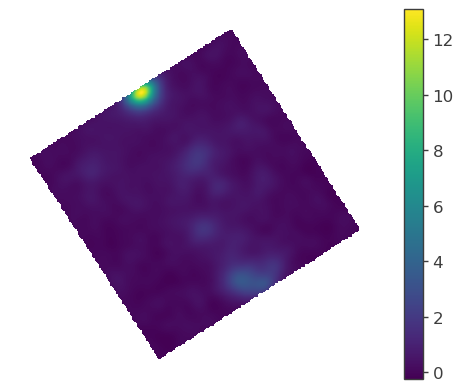

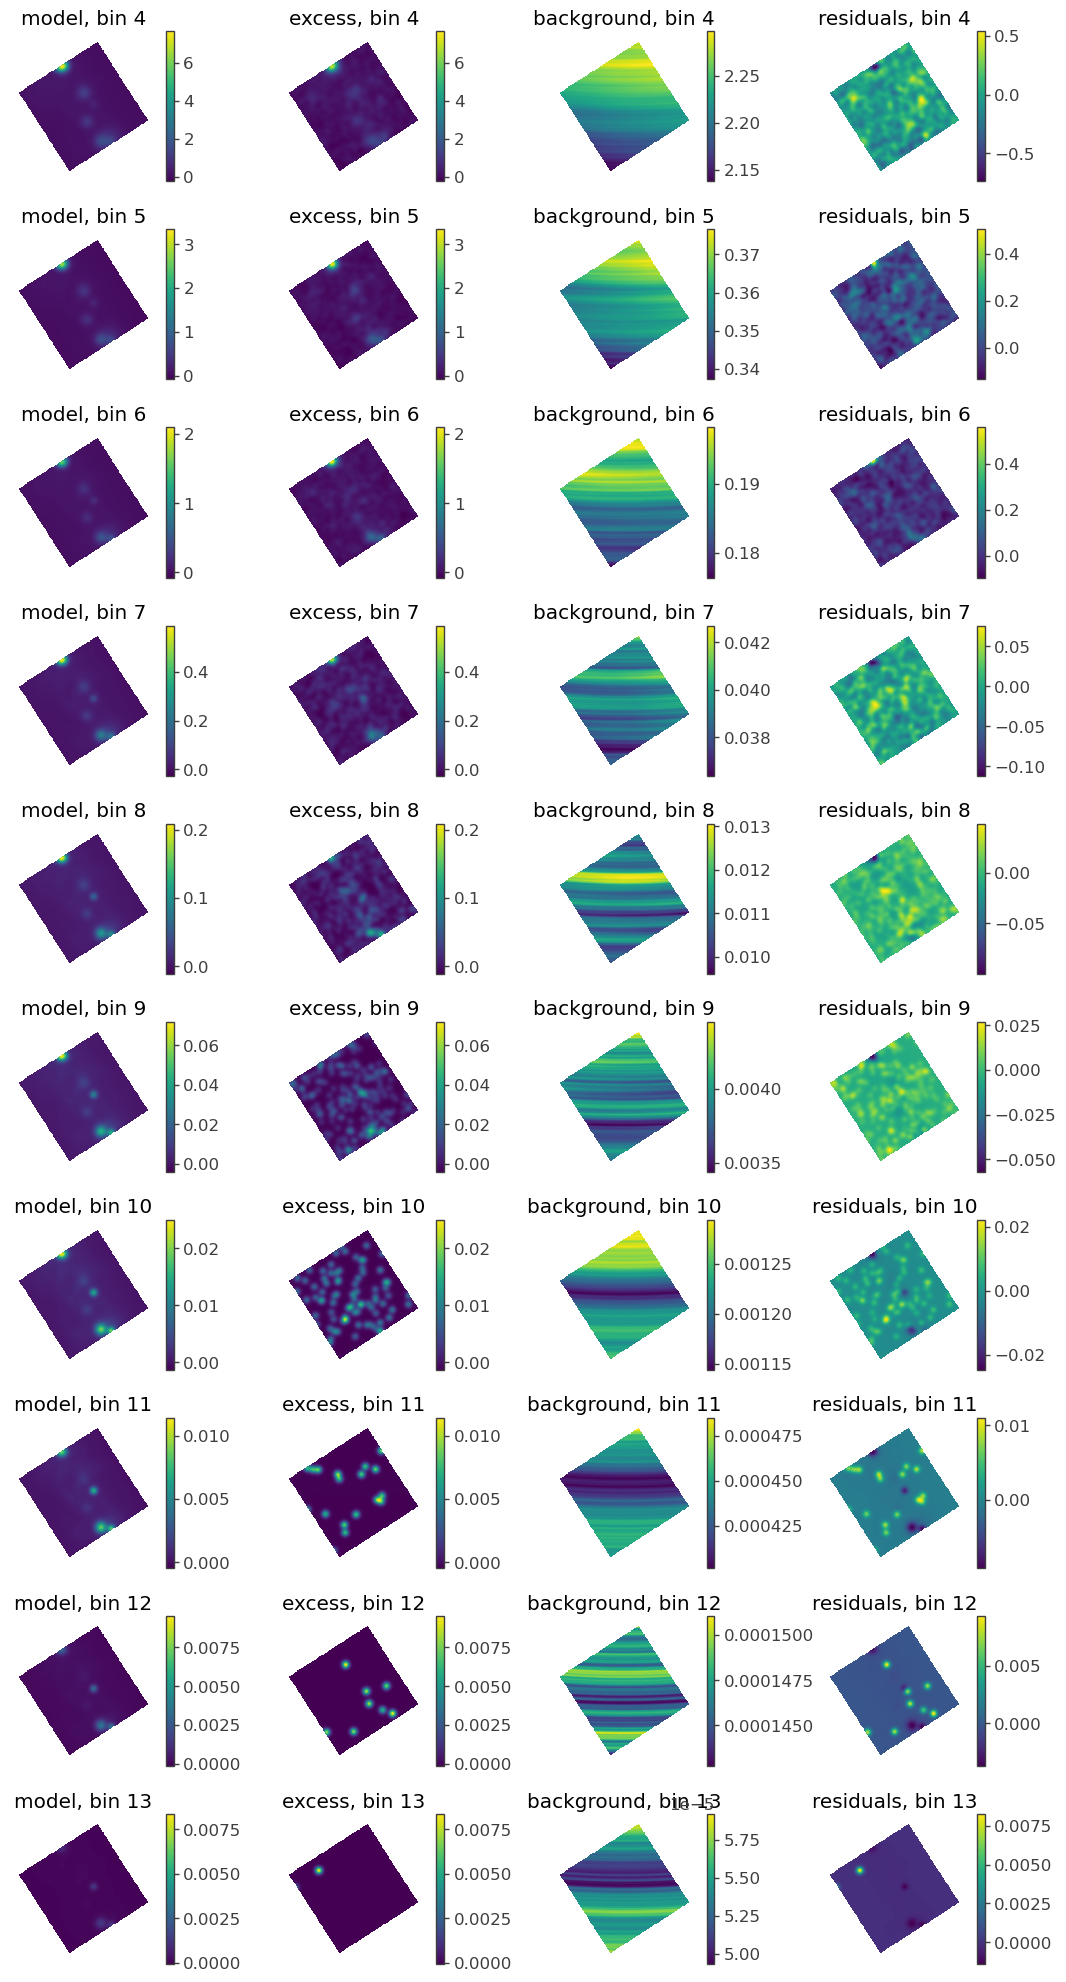

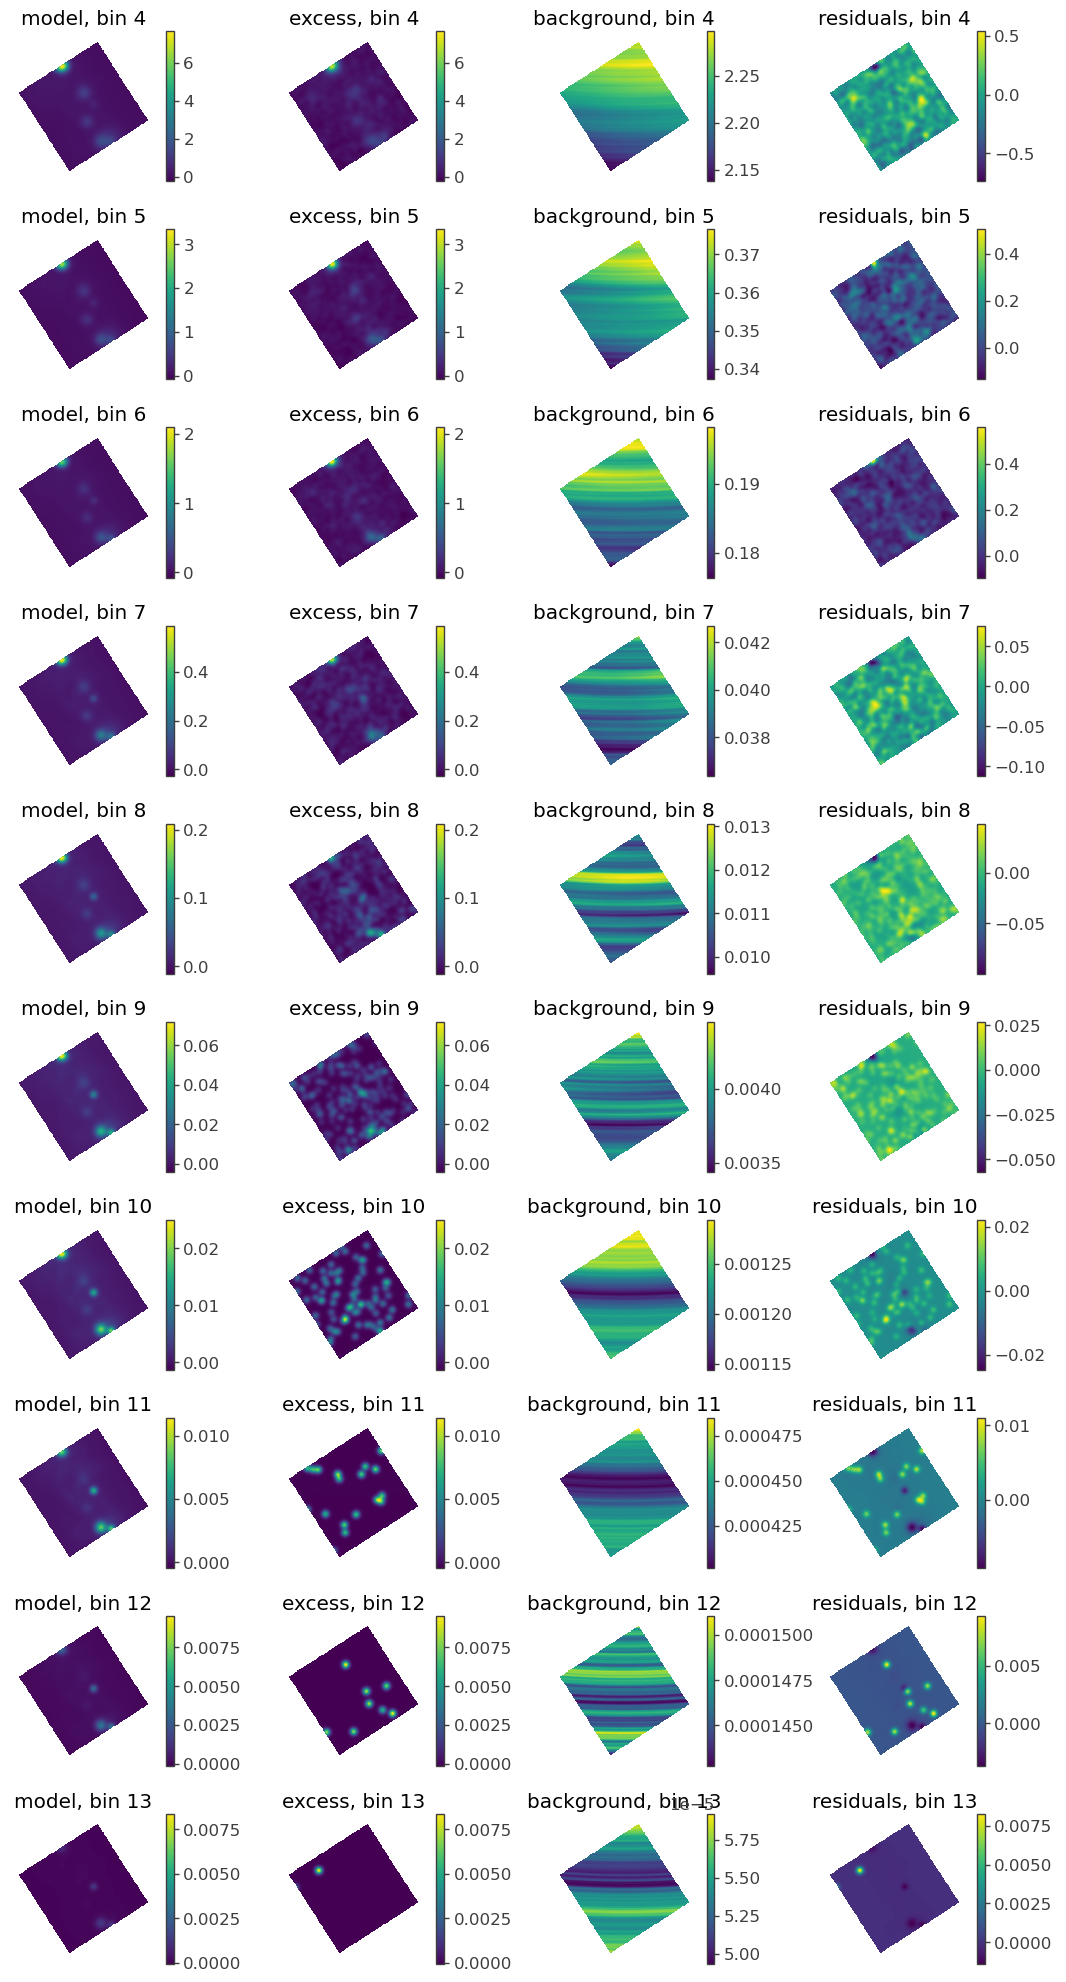

<Figure size 640x480 with 0 Axes>

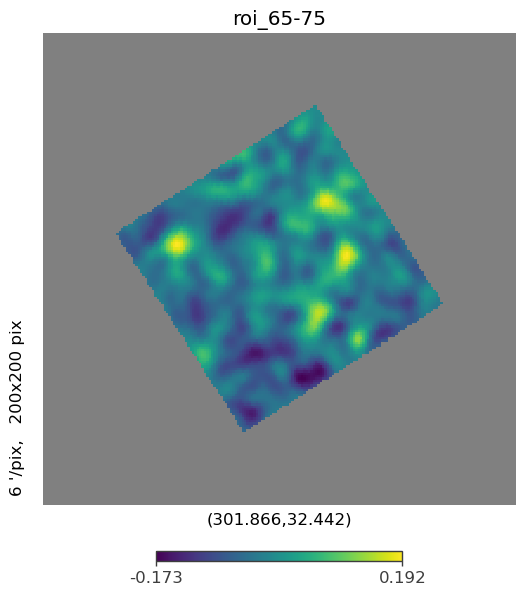

LHAASO:  1 297.94 26.15  1LHAASO J1951+2608  1.0
LHAASO:  2 297.94 26.15  1KM2A J1951+2608  0
LHAASO:  3 298.05 29.38 1LHAASO J1952+2922  0.0
LHAASO:  4 298.55 28.6  1WCDA J1954+2836u  0.0
LHAASO:  5 298.5 28.57  1LHAASO J1954+2836u   0.0
LHAASO:  6 298.63 32.88 1LHAASO J1954+3253  0.17
LHAASO:  7 299.24 29.35 1WCDA J1956+2921  0.99
LHAASO:  8 298.84 28.92 1LHAASO J1956+2921   0.78
LHAASO:  9 299.78 28.78  1LHAASO J1959+2846u  0.29
LHAASO:  10 299.78 28.78  1KM2A J1959+2846u  0
LHAASO:  11 300.64 32.74 1LHAASO J2002+3244u  0.0
LHAASO:  12 300.6 32.64 1LHAASO J2002+3244u   0.0
LHAASO:  13 301.3 34.25 1LHAASO J2005+3415*  0.74
LHAASO:  14 301.81 33.87 1LHAASO J2005+3415*   0.33
LHAASO:  15 301.45 30.85  1LHAASO J2005+3050  0.27
LHAASO:  16 301.37 30.99  1LHAASO J2005+3050   0.21
LHAASO:  17 304.65 36.72  1LHAASO J2018+3643u  0.24
LHAASO:  18 304.61 36.75  1LHAASO J2018+3643u   0.26
LHAASO:  19 305.14 36.63 1LHAASO J2020+3638  1.27
LHAASO:  20 305.23 36.82  1WCDA J2020+3649u  0.12
LHAASO:

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.00 +/- 0.08) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1777.535211
total,1777.535211


Values of statistical measures:

,statistical measures
AIC,3557.070432
BIC,3568.033748


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.24 +/- 0.09) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1640.657131
total,1640.657131


Values of statistical measures:

,statistical measures
AIC,3283.314271
BIC,3294.277587


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.13 +/- 0.10) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1556.701933
total,1556.701933


Values of statistical measures:

,statistical measures
AIC,3115.403876
BIC,3126.367192


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.02 +/- 0.11) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,1346.126775
total,1346.126775


Values of statistical measures:

,statistical measures
AIC,2694.253558
BIC,2705.216874


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.21 +/- 0.16) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,954.612125
total,954.612125


Values of statistical measures:

,statistical measures
AIC,1911.224259
BIC,1922.187575


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.15 +/- 0.23) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,550.612001
total,550.612001


Values of statistical measures:

,statistical measures
AIC,1103.224012
BIC,1114.187328


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.35 +/- 0.34) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,290.761771
total,290.761771


Values of statistical measures:

,statistical measures
AIC,583.523551
BIC,594.486867


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4 +/- 4) x 10^-25,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,90.014504
total,90.014504


Values of statistical measures:

,statistical measures
AIC,182.029017
BIC,192.992333


<Figure size 640x480 with 0 Axes>

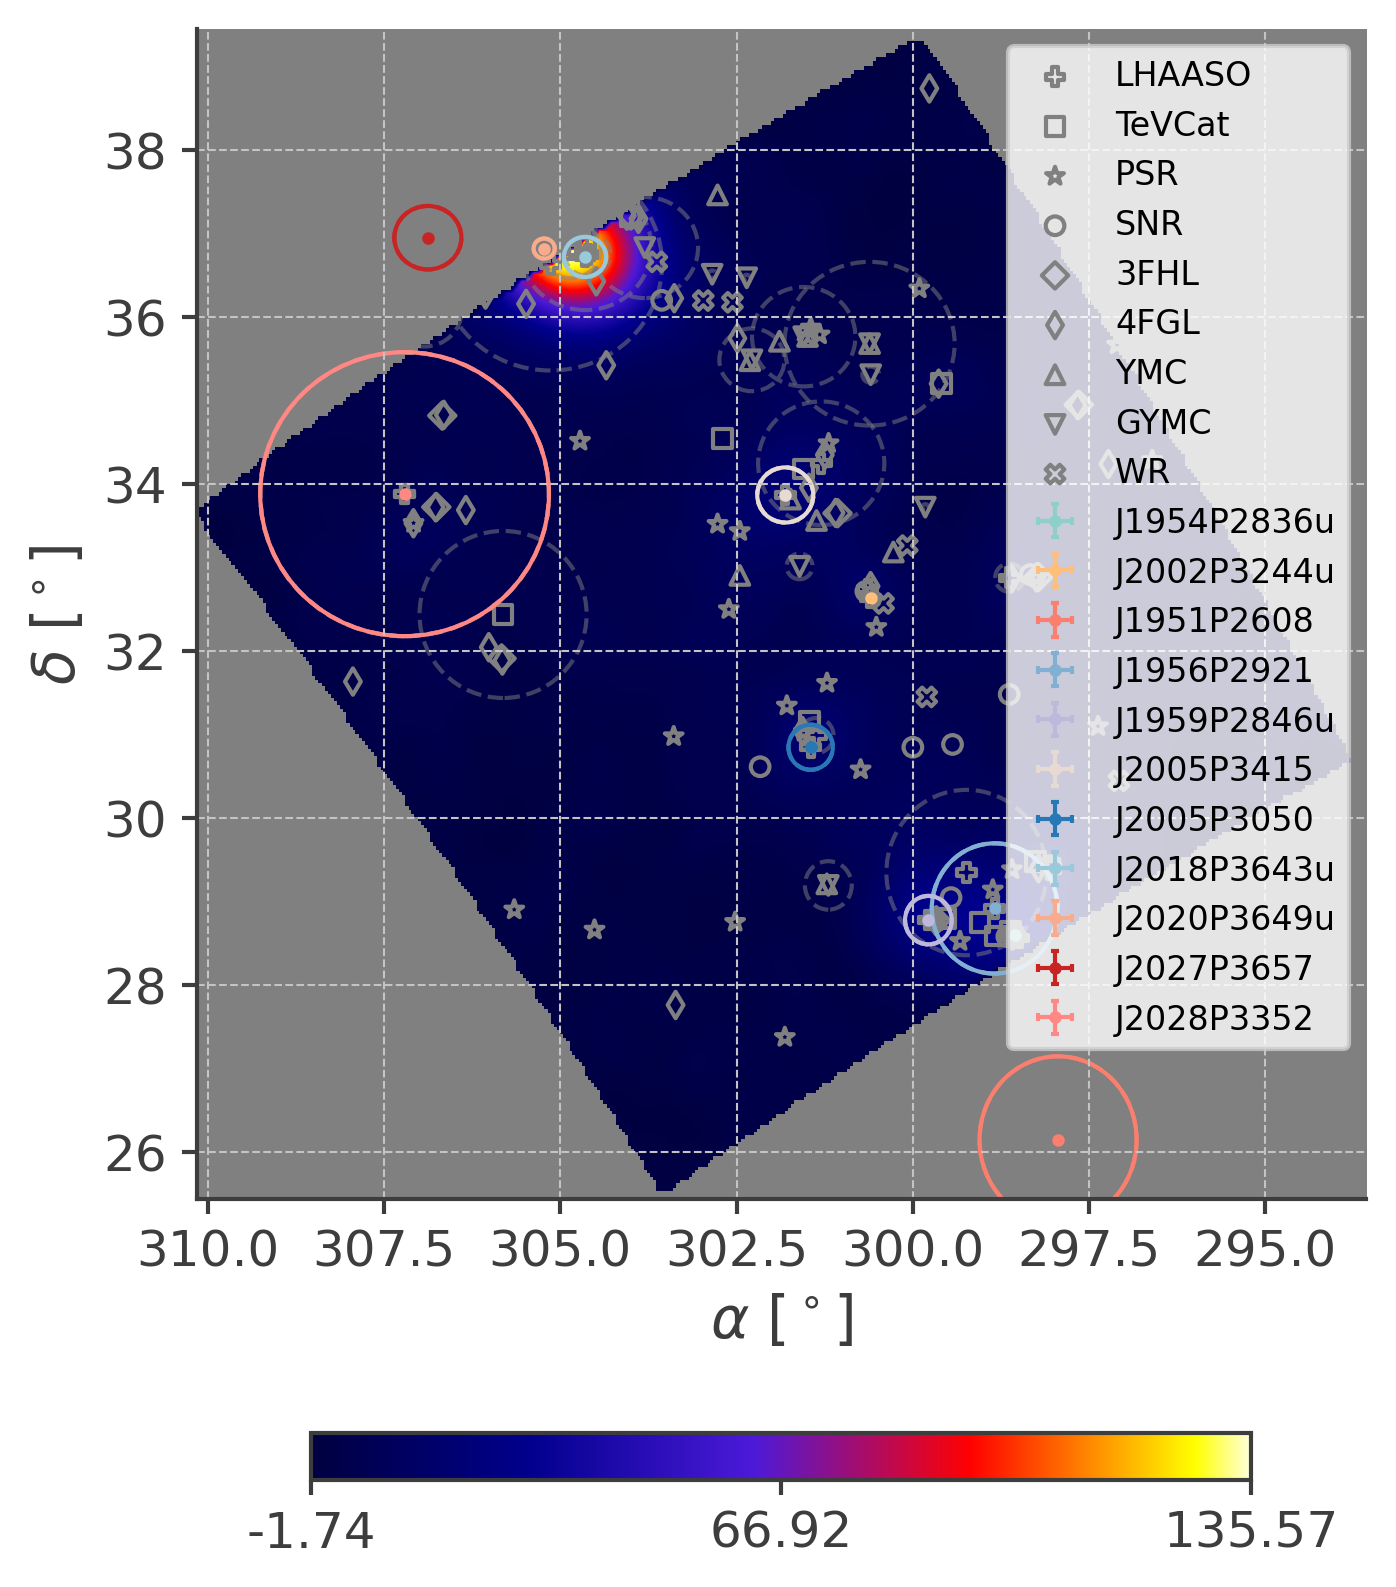

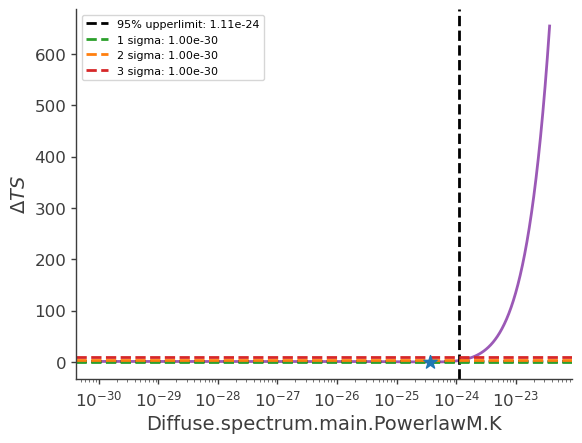

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(8 +/- 7) x 10^-25,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,47.359088
total,47.359088


Values of statistical measures:

,statistical measures
AIC,96.718184
BIC,107.681500


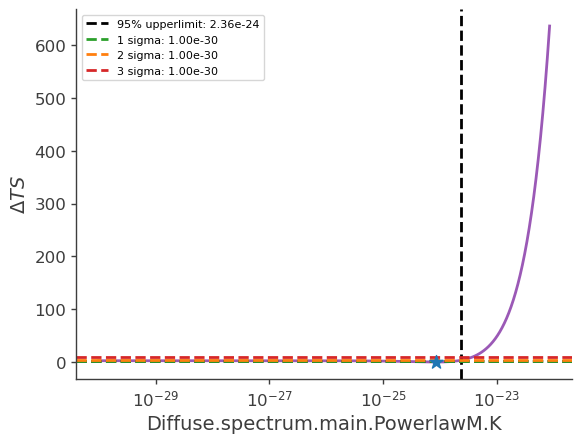

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(-2 +/- 7) x 10^-25,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,9.817956
total,9.817956


Values of statistical measures:

,statistical measures
AIC,21.635922
BIC,32.599238


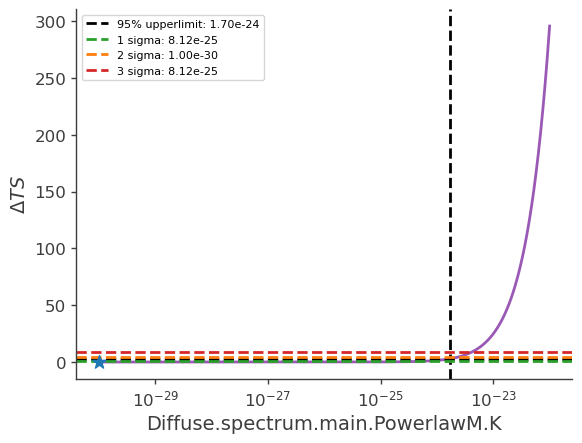


100%|██████████| 10/10 [06:32<00:00, 39.21s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

100%|██████████| 1/1 [23:02<00:00, 1382.95s/it]


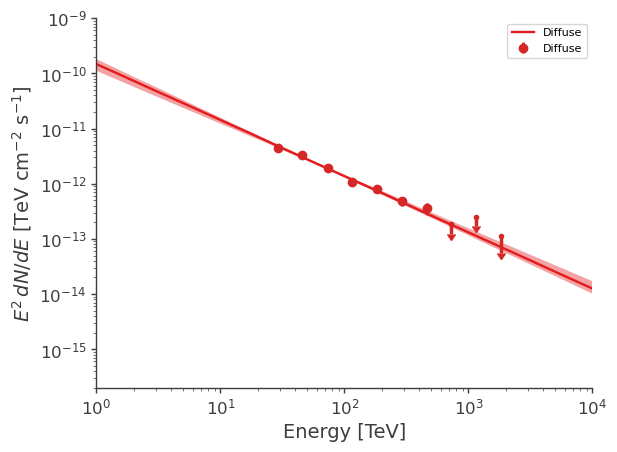

In [75]:
%matplotlib inline
#####   Data Initialize


maptree = "../../data/KM2A1234full_skymap_rcy.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"
response = "../../data/KM2A1234full_mcpsfnewfix13.root"

region_name="Diffuse_KM2A_case1"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm([70])): #15 #range(20,360,10)
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 7.0
    model_radius = 7.5

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.1)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()
    KM2A.psf_integration_method="exact"


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=20, rtindex=15, rtp=8,  detector="KM2A", roi=roi, pf=True, sf=True, kf=False, indexf=True, mkf=True, mindexf=False) #, fixall=True,  , Kscale= 1e-25 #, indexb=(-5.5, -1.5)

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, piv=50, name=region_name, ifreturnratio=True, indexb=(-5, -1), index=-3, kbratio=1000, K=5e-16,  Kb=(1e-17, 1e-14),
                ) # , , Kn=1e-25
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 13, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50)
    import matplotlib as mpl

    x_Max=10000.
    x_Min=1
    y_Min=0.2e-15
    y_Max=1e-9
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


roi_15-25


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_25-35


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_35-45


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_45-55


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_55-65


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_65-75


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_75-85


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_85-95
roi_95-105
roi_105-115
roi_115-125
roi_125-135
roi_135-145
roi_145-155
roi_155-165
roi_165-175
roi_175-185
roi_185-195
roi_195-205
roi_205-215
roi_215-225
roi_225-235


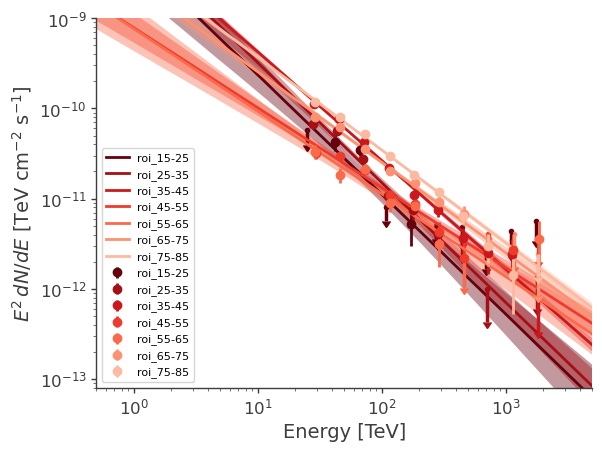

In [46]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=5000.
x_Min=0.5
y_Min=0.8e-13
y_Max=1e-9
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files): #[:7]
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(20,360,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/Diffuse_WCDA_case10/resultsall.npy")
        dkf = resultfile[9]
    if i < 7:
        # try:
        plot_spectra(
            resultsss,
            sources_to_use=["Diffuse"],
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit=f"TeV/(s cm2)", #*
            subplot=ax,
            plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
            )
        try:
            data = my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
        except:
            pass
        # except Exception as e:
        #     print(f"Error: {e}")
        #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

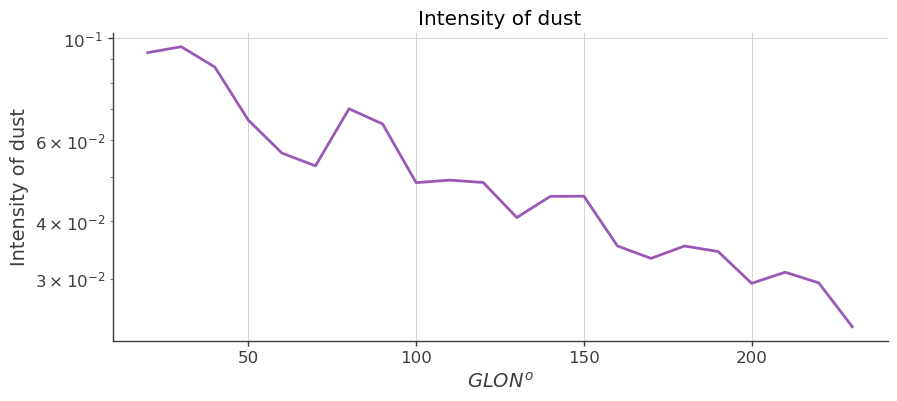

In [47]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

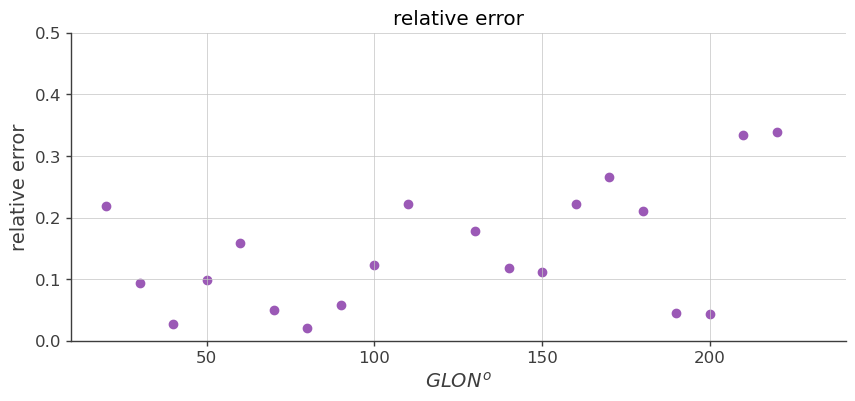

In [48]:
plt.figure(figsize=(10,4)) #
plt.scatter(gc, (np.array(de)*1e9)/(np.array(dk)*1e9), marker="o") #np.array(den)*1e9, np.array(dep)*1e9
# plt.yscale("log")
plt.title("relative error")
plt.ylim(0, 0.5)
plt.ylabel("relative error")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

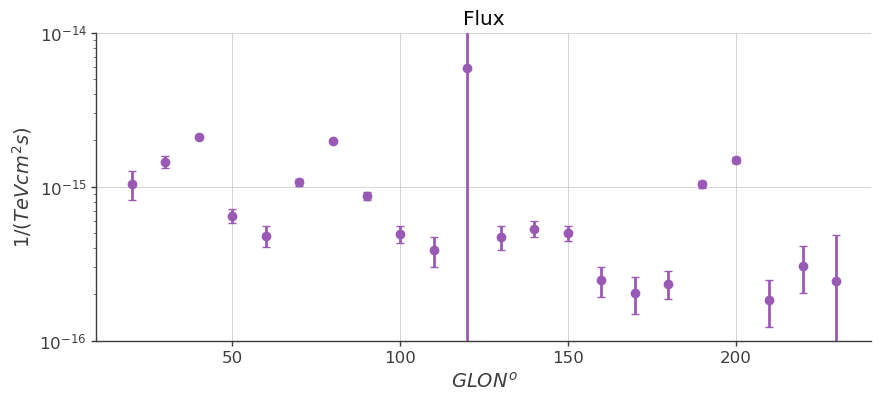

In [52]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-16, 1e-14)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

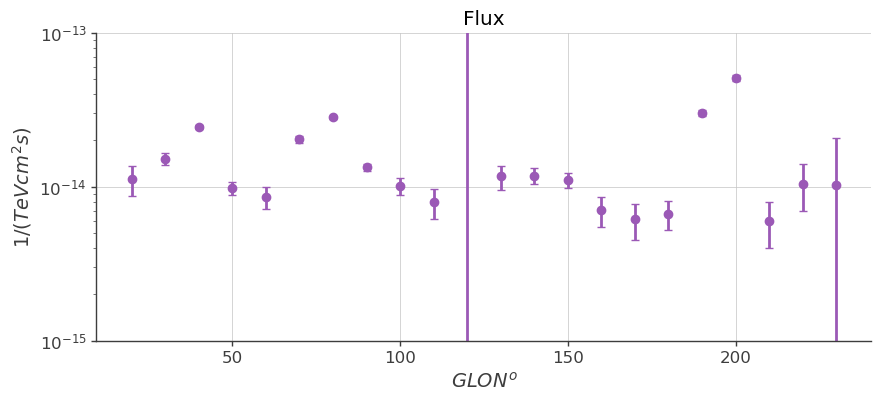

In [53]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-15, 1e-13)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

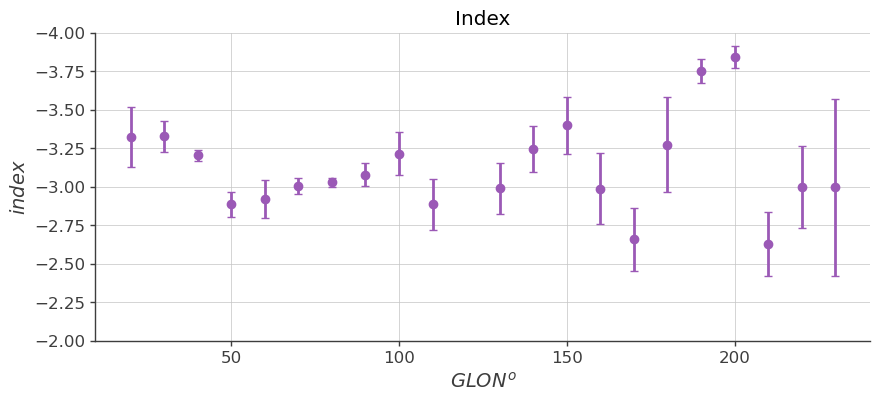

In [51]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o", capsize=3) #dien, diep
plt.ylim(-2,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)